In [12]:
import numpy as np
import sys
from importlib import reload 
import scipy.interpolate as interp
import scipy.constants as const
import scipy.integrate as integ

import cython
%load_ext Cython

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [14]:
# importing MS and HM modules. Reload modules if needed
try :
    reload(ms_hm.MS)
    reload(ms_hm.HM)
    reload(ms_hm.QCD_EOS)
except :
    print("Did not reload modules")

import ms_hm
from ms_hm.QCD_EOS import *
from ms_hm.MS import *
from ms_hm.HM import *

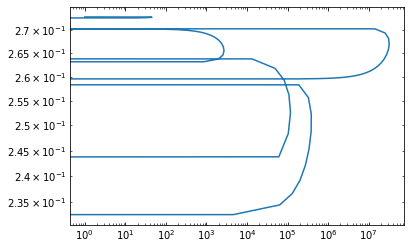

In [31]:
#obtaining deltac and density values
combineddata = np.array([[1.0*10**0, 0.27276420593261713, 0.27279510498046866],
[1.0*10**10, 0.23670630455017086, 0.23670644760131831],
[1.0*10**11, 0.25943684577941895, 0.25943698883056643],
[1.0*10**12, 0.26031646728515623, 0.26031689643859857],
[1.0*10**13, 0.266887092590332, 0.26689224243164056],
[1.0*10**14, 0.2704902648925781, 0.27050571441650384],
[1.0*10**15, 0.27051086425781246, 0.2705263137817382],
[1.0*10**16, 0.27070827484130855, 0.27072372436523434],
[1.0*10**1, 0.27276420593261713, 0.27279510498046866],
[1.0*10**2, 0.27276420593261713, 0.27279510498046866],
[1.0*10**3, 0.2727664947509765, 0.27279052734375],
[1.0*10**4, 0.2727264404296874, 0.2727504730224609],
[1.0*10**5, 0.27176513671875, 0.2717811584472656],
[1.0*10**6, 0.26940765380859377, 0.269417953491211],
[1.0*10**7, 0.26312685012817383, 0.26312770843505856],
[1.0*10**8, 0.2643585205078124, 0.26435980796813957],
[1.0*10**9, 0.25926346778869624, 0.2592636108398437],
[1.259*10**0, 0.27276420593261713, 0.27279510498046866],
[1.259*10**10, 0.2392333030700683, 0.23923344612121578],
[1.259*10**11, 0.25946044921875, 0.25946087837219234],
[1.259*10**12, 0.26056251525878904, 0.2605626583099365],
[1.259*10**13, 0.26810989379882805, 0.26811504364013666],
[1.259*10**14, 0.2704902648925781, 0.27050571441650384],
[1.259*10**15, 0.27052001953124993, 0.2705320358276367],
[1.259*10**16, 0.2707683563232422, 0.2707786560058594],
[1.259*10**1, 0.27276420593261713, 0.27279510498046866],
[1.259*10**2, 0.27276420593261713, 0.27279510498046866],
[1.259*10**3, 0.27276306152343743, 0.27278709411621094],
[1.259*10**4, 0.2727149963378906, 0.27273559570312494],
[1.259*10**5, 0.27150249481201166, 0.27151794433593746],
[1.259*10**6, 0.26910552978515623, 0.26911325454711915],
[1.259*10**7, 0.26306133270263665, 0.26306176185607905],
[1.259*10**8, 0.26466236114501945, 0.2646636486053466],
[1.259*10**9, 0.2562359333038329, 0.25623607635498036],
[1.585*10**0, 0.27276420593261713, 0.27279510498046866],
[1.585*10**10, 0.24212265014648435, 0.2421227931976318],
[1.585*10**11, 0.2594919204711914, 0.2594920635223389],
[1.585*10**12, 0.260866641998291, 0.2608669281005859],
[1.585*10**13, 0.26927490234374996, 0.26928291320800773],
[1.585*10**14, 0.2704954147338867, 0.27051086425781246],
[1.585*10**15, 0.27052803039550777, 0.27053833007812494],
[1.585*10**16, 0.27083587646484375, 0.2708478927612305],
[1.585*10**1, 0.27276420593261713, 0.27279510498046866],
[1.585*10**2, 0.27276420593261713, 0.27279510498046866],
[1.585*10**3, 0.27276306152343743, 0.27278709411621094],
[1.585*10**4, 0.2726966857910156, 0.27271728515624993],
[1.585*10**5, 0.27120265960693357, 0.2712181091308593],
[1.585*10**6, 0.2687324523925781, 0.2687376022338867],
[1.585*10**7, 0.2631174087524414, 0.26311798095703126],
[1.585*10**8, 0.26499366760253895, 0.26499538421630847],
[1.585*10**9, 0.25260014533996566, 0.25260028839111315],
[1.995*10**0, 0.27276420593261713, 0.27279510498046866],
[1.995*10**10, 0.24533929824829098, 0.24533944129943844],
[1.995*10**11, 0.25953283309936515, 0.2595331192016601],
[1.995*10**12, 0.26124086380004885, 0.2612412929534912],
[1.995*10**13, 0.2701824188232422, 0.27019271850585935],
[1.995*10**14, 0.2704971313476562, 0.2705074310302734],
[1.995*10**15, 0.27053718566894525, 0.2705474853515625],
[1.995*10**16, 0.27091999053955074, 0.27093544006347653],
[1.995*10**1, 0.27276420593261713, 0.27279510498046866],
[1.995*10**2, 0.27276420593261713, 0.27279510498046866],
[1.995*10**3, 0.27276306152343743, 0.27278709411621094],
[1.995*10**4, 0.2726692199707031, 0.27268981933593744],
[1.995*10**5, 0.2708770751953125, 0.27089509963989256],
[1.995*10**6, 0.2682764053344726, 0.26828155517578123],
[1.995*10**7, 0.2631872177124023, 0.26318778991699215],
[1.995*10**8, 0.2653312683105469, 0.2653329849243164],
[1.995*10**9, 0.24838070869445797, 0.24838085174560542],
[2.511*10**0, 0.27276420593261713, 0.27279510498046866],
[2.511*10**10, 0.24879884719848627, 0.24879899024963373],
[2.511*10**11, 0.2595844745635986, 0.259584903717041],
[2.511*10**12, 0.2616989135742187, 0.2616997718811035],
[2.511*10**13, 0.27049369812011714, 0.2705039978027343],
[2.511*10**14, 0.2704971313476562, 0.27050914764404294],
[2.511*10**15, 0.2705474853515625, 0.27055950164794923],
[2.511*10**16, 0.2710235595703125, 0.2710390090942383],
[2.511*10**1, 0.27276420593261713, 0.27279510498046866],
[2.511*10**2, 0.27276420593261713, 0.27279510498046866],
[2.511*10**3, 0.2727619171142578, 0.27278594970703124],
[2.511*10**4, 0.27262802124023433, 0.2726486206054687],
[2.511*10**5, 0.27055664062499996, 0.2705686569213867],
[2.511*10**6, 0.26772537231445304, 0.26773052215576165],
[2.511*10**7, 0.2632736206054687, 0.2632741928100586],
[2.511*10**8, 0.2656319618225097, 0.265634536743164],
[2.511*10**9, 0.2437834739685058, 0.2437836170196533],
[3.162*10**0, 0.27276420593261713, 0.27279510498046866],
[3.162*10**10, 0.2523422241210937, 0.2523423671722411],
[3.162*10**11, 0.2596494197845458, 0.2596495628356933],
[3.162*10**12, 0.2622573852539062, 0.2622578144073485],
[3.162*10**13, 0.27049369812011714, 0.2705039978027343],
[3.162*10**14, 0.2704988479614257, 0.27051086425781246],
[3.162*10**15, 0.2705612182617187, 0.27057495117187497],
[3.162*10**16, 0.27115459442138673, 0.2711700439453125],
[3.162*10**1, 0.27276420593261713, 0.27279510498046866],
[3.162*10**2, 0.27276420593261713, 0.27279510498046866],
[3.162*10**3, 0.272757339477539, 0.2727813720703125],
[3.162*10**4, 0.2725616455078125, 0.27258224487304683],
[3.162*10**5, 0.2702854156494141, 0.2702957153320313],
[3.162*10**6, 0.2670696258544922, 0.2670730590820312],
[3.162*10**7, 0.263380479812622, 0.2633809089660644],
[3.162*10**8, 0.2658187866210937, 0.2658205032348633],
[3.162*10**9, 0.23941082954406734, 0.2394109725952148],
[3.981*10**0, 0.27276420593261713, 0.27279510498046866],
[3.981*10**10, 0.2556690216064452, 0.2556691646575927],
[3.981*10**11, 0.2597308158874511, 0.25973095893859854],
[3.981*10**12, 0.26292858123779295, 0.2629291534423828],
[3.981*10**13, 0.27049369812011714, 0.2705039978027343],
[3.981*10**14, 0.270501708984375, 0.27051200866699215],
[3.981*10**15, 0.2705795288085937, 0.27059154510498046],
[3.981*10**16, 0.27130966186523436, 0.27132568359375],
[3.981*10**1, 0.27276420593261713, 0.27279510498046866],
[3.981*10**2, 0.27276992797851557, 0.27279052734375],
[3.981*10**3, 0.27275390624999996, 0.27277793884277346],
[3.981*10**4, 0.2724609375, 0.2724815368652344],
[3.981*10**5, 0.27014007568359377, 0.270150375366211],
[3.981*10**6, 0.26630859375, 0.26631088256835933],
[3.981*10**7, 0.2635113716125488, 0.2635122299194335],
[3.981*10**8, 0.26574783325195306, 0.2657504081726073],
[3.981*10**9, 0.23563885688781738, 0.23563899993896484],
[5.012*10**0, 0.27276420593261713, 0.27279510498046866],
[5.012*10**10, 0.25829830169677725, 0.25829844474792474],
[5.012*10**11, 0.25983238220214844, 0.2598328113555908],
[5.012*10**12, 0.26372623443603505, 0.2637268066406249],
[5.012*10**13, 0.27049369812011714, 0.2705039978027343],
[5.012*10**14, 0.2705034255981445, 0.2705154418945312],
[5.012*10**15, 0.2706001281738281, 0.2706155776977539],
[5.012*10**16, 0.27149734497070305, 0.27151279449462884],
[5.012*10**1, 0.27276420593261713, 0.27279510498046866],
[5.012*10**2, 0.27276992797851557, 0.27279052734375],
[5.012*10**3, 0.2727458953857422, 0.2727767944335937],
[5.012*10**4, 0.2723247528076172, 0.27235565185546873],
[5.012*10**5, 0.2700119018554688, 0.2700239181518555],
[5.012*10**6, 0.2654554367065429, 0.2654571533203125],
[5.012*10**7, 0.26367073059082025, 0.26367158889770503],
[5.012*10**8, 0.2651756286621093, 0.26517734527587883],
[5.012*10**9, 0.2328356266021728, 0.23283576965332026],
[6.310*10**0, 0.27276420593261713, 0.27279510498046866],
[6.310*10**10, 0.25940437316894527, 0.25940451622009275],
[6.310*10**11, 0.2599598407745361, 0.2599602699279785],
[6.310*10**12, 0.2646574974060058, 0.26465835571289054],
[6.310*10**13, 0.27049369812011714, 0.2705039978027343],
[6.310*10**14, 0.2705062866210937, 0.2705183029174804],
[6.310*10**15, 0.2706315994262695, 0.27064361572265627],
[6.310*10**16, 0.27171936035156247, 0.27173480987548826],
[6.310*10**1, 0.27276420593261713, 0.27279510498046866],
[6.310*10**2, 0.2727664947509765, 0.27279052734375],
[6.310*10**3, 0.27274332046508787, 0.27276649475097653],
[6.310*10**4, 0.2721748352050781, 0.2721954345703125],
[6.310*10**5, 0.26985511779785154, 0.26986284255981446],
[6.310*10**6, 0.264554214477539, 0.26455678939819327],
[6.310*10**7, 0.2638629913330078, 0.26386384963989257],
[6.310*10**8, 0.2637353897094726, 0.2637362480163573],
[6.310*10**9, 0.23271403312683103, 0.23271417617797852],
[7.943*10**0, 0.27276420593261713, 0.27279510498046866],
[7.943*10**10, 0.2594185352325439, 0.25941867828369136],
[7.943*10**11, 0.26011877059936517, 0.26011891365051265],
[7.943*10**12, 0.26571807861328123, 0.2657200813293457],
[7.943*10**13, 0.2704902648925781, 0.27050571441650384],
[7.943*10**14, 0.27051086425781246, 0.2705211639404297],
[7.943*10**15, 0.27066650390625, 0.2706785202026367],
[7.943*10**16, 0.27197570800781246, 0.2719937324523925],
[7.943*10**1, 0.27276420593261713, 0.27279510498046866],
[7.943*10**2, 0.2727664947509765, 0.27279052734375],
[7.943*10**3, 0.272735595703125, 0.27275962829589845],
[7.943*10**4, 0.27198486328124993, 0.27200889587402344],
[7.943*10**5, 0.26965742111206054, 0.26966514587402346],
[7.943*10**6, 0.2637116432189941, 0.26371250152587883],
[7.943*10**7, 0.26409158706665037, 0.2640924453735351],
[7.943*10**8, 0.2617371082305907, 0.2617375373840331],
[7.943*10**9, 0.23454065322875978, 0.23454079627990723]])
combineddata = combineddata[combineddata[:, 0].argsort()]
deltac = (combineddata[:,1] + combineddata[:,2]) / 2
rho = combineddata[:,0]
T = QCD_EOS().ToFrho(rho)
Mhorizon = QCD_EOS().MH(T)
Order = Mhorizon.argsort()
Mhorizon = Mhorizon[Order]
#deltac = deltac[Order]
#deltac = interp.InterpolatedUnivariateSpline(Mhorizon, deltac, ext = 3)
plt.loglog(T, deltac)

In [4]:
# explicitly write mu in integrand, initializing variables in eq. 26. Once proper unit conversions are found, Mhorizon and Meq will need to be changed. Sigma and gamma will later be made more rigerous
omegaCDM = 0.2589
sigmasquared = 0.004
M = np.logspace(-3,3,100)
k = 3.3
#mu = np.multiply(M, (k*Mhorizon)**(-1))
gamma = 0.36
Meq = 2.8e17

In [5]:
#compute integral, figure out how to choose what we are integrating with respect to...also, deltac depends on MH so make sure this isn't bad either
qcd = QCD_EOS()
def integrand(M):
    return (2 / (2*np.pi*sigmasquared)) * np.exp(-((np.multiply(M, (k*qcd.Morizon(T))**(-1)))**(1/gamma)+deltac)**2/(2*sigmasquared))*((M*(np.multiply(M, (k*qcd.Mhorizon)**(-1)))**(1/gamma))/(gamma*Mhorizon))*np.sqrt(Meq/Mhorizon)
def fraction(M):
    return (1/omegaCDM)*integ.simps(integrand(M),Mhorizon)
points = np.array([fraction(m) for m in M])

NameError: name 'Mhorizon' is not defined

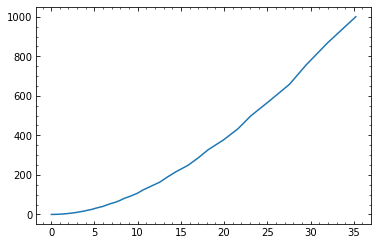

In [109]:
plt.plot(points,M)

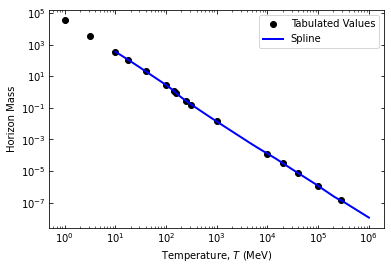

In [3]:
qcd = QCD_EOS()
qcd.MH_plot()